In [27]:
import utils
from utils import *

In [26]:
import importlib
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\lucas\\DataScience\\l3stockmdl\\utils.py'>

In [28]:
#df, meta_data = get_data('PETR4.SA.SAO')
#print(meta_data)

df = pd.read_csv('./databases/PETR4_2024-09-13.csv')
df = stock_feature_prep(df)

lgbm, best_params, best_score, y_pred, y_val = modeling(df)
df['predicted'] = lgbm.predict(df[lgbm.feature_name_])

from sklearn.metrics import r2_score, mean_squared_error

# Calculate R2 score
r2 = r2_score(y_val, y_pred)

# Calculate RMSE
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2, rmse

(0.9656913577587708, 0.13336585307096727)

In [10]:
import joblib
# Save model
joblib.dump(lgbm, f'./mdl_versions/PETR4_2024-09-13.joblib')

['./mdl_versions/PETR4_2024-09-13.joblib']

In [4]:
import plotly.graph_objects as go

df.sort_values('date', inplace=True)
temp = df[df['date'] > '2024-07-01']

# Create a Plotly figure
fig = go.Figure()

# Add observed data
fig.add_trace(go.Scatter(x=temp['date'], y=temp['target'], mode='lines', name='Observed', line=dict(color='orange')))

# Add predicted data
fig.add_trace(go.Scatter(x=temp['date'], y=temp['predicted'], mode='lines', name='Predicted', line=dict(color='orange', dash='dash')))

# Update layout
fig.update_layout(
    title='Stock Close Price per Day',
    xaxis_title='Date',
    yaxis_title='Close Price',
    legend=dict(x=0, y=1)
)

# Display the Plotly figure using Streamlit
fig.show()

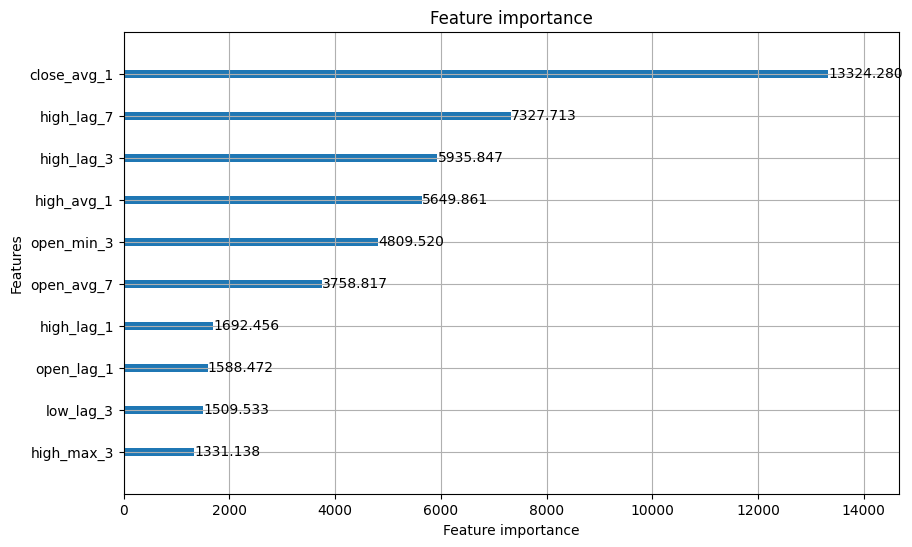

In [ ]:
# Assuming you have a trained LightGBM model named 'lgbm'
lgb.plot_importance(lgbm, importance_type='gain', figsize=(10, 6), max_num_features=10)
plt.show()